# Hierarchical clustering

One main disadvantage of K-Means is that it needs us to pre-enter the number of clusters (K). Hierarchical clustering is an alternative approach which does not need us to give the value of K beforehand and also, it creates a beautiful tree-based structure for visualization.

Here, we are going to discuss the bottom-up (or Agglomerative) approach of cluster building.
We start by defining any sort of similarity between the datapoints. Generally, we consider the Euclidean distance. The points which are closer to each are more similar than the points which re farther away. The Algorithms starts with considering all points as separate clusters and then grouping pints together to form clusters.


**The Algorithm:**

1.	Begin with n observations and a measure (such as Euclidean distance) of all the n(n−1)/2 pairwise dissimilarities(or the Euclidean distances generally). Treat each observation as its own cluster. Initially, we have n clusters.
2.	Compare all the distances and put the two closest points/clusters in the same cluster. The dissimilarity(or the Euclidean distances) between these two clusters indicates the height in the dendrogram at which the fusion line should be placed.
3.	Compute the new pairwise inter-cluster dissimilarities(or the Euclidean distances) among the remaining clusters.
4.	Repeat steps 2 and 3 till we have only one cluster left.


**Code Example**

In [7]:
# Doing the necessary imports
%pylab inline
from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist
matplotlib.rc("image",cmap="gray")
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Importing the necessary libraries
import random as pyrandom
from scipy.spatial.distance import cdist
figsize(6,6)

In [11]:
#Defining a method to plot the clusters
ccolors = ['go', 'ro','bo','mo','co','yo']
def plotclusters(data,centers=None):
    xlim([0,100]); ylim([0,100])
    if centers is None:
        plot(data[:,0],data[:,1],'bo',markersize=5)
    else:
        for i in range(amax(centers)+1):
            plot(data[centers==i,0],data[centers==i,1],ccolors[i%len(ccolors)],markersize=5)

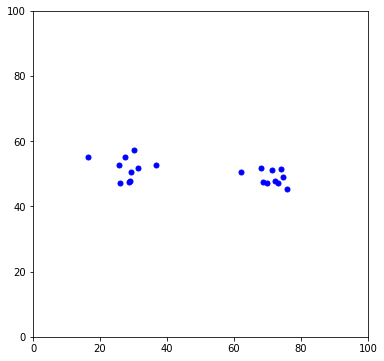

In [12]:
# A Simple Clustering Problem
data = r_[4*randn(10,2)+array([70,50]),
          4*randn(10,2)+array([30,50])]
# shuffle(data)
plotclusters(data)

The idea behind linkage clustering, or hierarchical clustering, is to put things that are close together into the same cluster. Linkage clustering is usually based on distances only.

In [13]:
# Compute distance between each pair of the two collections of inputs i.e., calculate distance between all the points in data
from scipy.spatial.distance import cdist
ds = cdist(data,data)

Based on pairwise distances, we can now compute a linkage matrix. We successively merge the closest points/clusters into the same cluster. The linkage "matrix" is simply a table listing which pairs of points are merged at what step and what distance.

In [36]:
from scipy.cluster.hierarchy import *
lm = linkage(ds,"single")
lm

<ipython-input-36-bb8d7851ac23>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  lm = linkage(ds,"single")


array([[ 10.        ,  12.        ,   0.91222358,   2.        ],
       [  4.        ,   8.        ,   3.78277568,   2.        ],
       [  5.        ,   6.        ,   5.29238236,   2.        ],
       [  2.        ,   9.        ,   5.91701016,   2.        ],
       [ 16.        ,  20.        ,   7.57135086,   3.        ],
       [ 21.        ,  23.        ,   7.59311474,   4.        ],
       [  0.        ,  25.        ,   8.34437981,   5.        ],
       [ 15.        ,  18.        ,   8.47930974,   2.        ],
       [ 17.        ,  24.        ,   8.67869866,   4.        ],
       [ 22.        ,  26.        ,   9.23601275,   7.        ],
       [  7.        ,  29.        ,   9.3964663 ,   8.        ],
       [  1.        ,  30.        ,   9.56934356,   9.        ],
       [ 19.        ,  28.        ,  10.41258238,   5.        ],
       [ 13.        ,  27.        ,  10.63294986,   3.        ],
       [ 32.        ,  33.        ,  11.70934125,   8.        ],
       [ 14.        ,  34

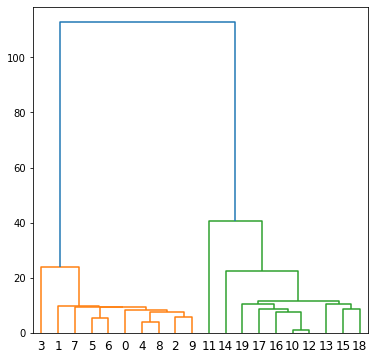

In [31]:
_=dendrogram(lm)

We can "cut" the dendrogram to form flat clusters. If we cut the above diagram into two clusters, we get a good answer.

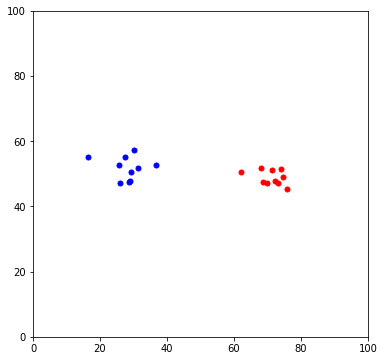

In [17]:
## Plotting the individual clusters
plotclusters(data,fcluster(lm,2,criterion='maxclust'))

As you can see that now the clusters are shown in two different colours. It means that the algorithm has created two separate groupings based on some similarity criteria.

In the lines above, have talked about linkage matrices and we have written in our code _lm = linkage(ds,"**single**")_. So Let’s discuss about the different types of linkages that we generally use.

**Linkage Methods**

In [18]:
# Taking a data for example
data = r_[dot(randn(100,2),diag([4,10]))+array([60,60]),
           dot(randn(100,2),diag([4,10]))+array([40,40])]
shuffle(data)

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- Single Linkage: cluster distance = smallest pairwise distance
- Complete Linkage: cluster distance = largest pairwise distance
- Average Linkage: cluster distance = average pairwise distance
- Centroid Linkage: cluster distance=  distance between the centroids of the clusters
- Ward’s Linkage: cluster criteria= Minimize the variance in the cluster


**Single Linkage:** Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with an unusual structure


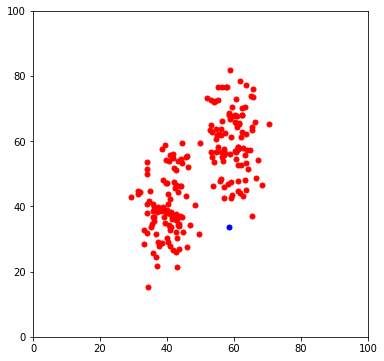

In [19]:
assignment = fclusterdata(data,2,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

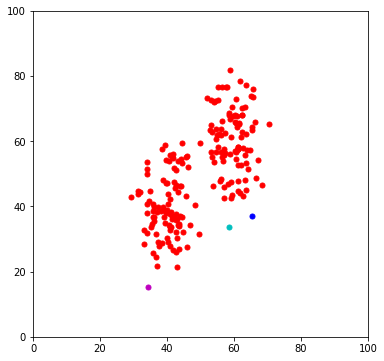

In [20]:
assignment = fclusterdata(data,4,metric='euclidean',method='single',criterion='maxclust')
plotclusters(data,assignment)

**Complete Linkage:** Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage


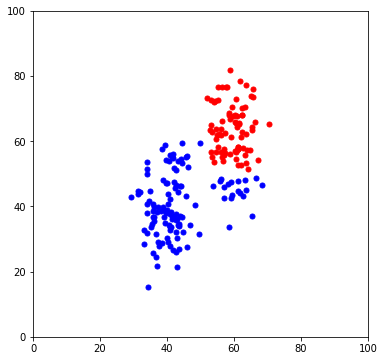

In [21]:
assignment = fclusterdata(data,2,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

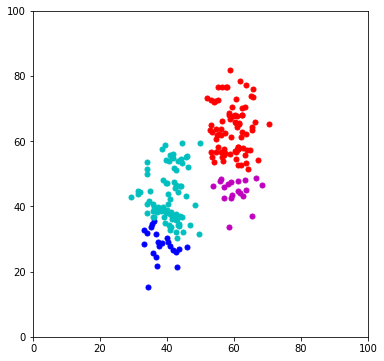

In [22]:
assignment = fclusterdata(data,4,metric='euclidean',method='complete',criterion='maxclust')
plotclusters(data,assignment)

**Average Linkage:** Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.


- cluster distance is the average distance of all pairs of points in clusters 1 and 2


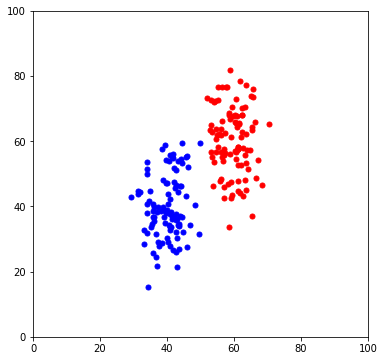

In [23]:
assignment = fclusterdata(data,2,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

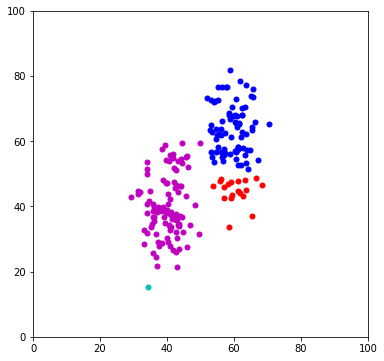

In [24]:
assignment = fclusterdata(data,4,metric='euclidean',method='average',criterion='maxclust')
plotclusters(data,assignment)

**Centroid Linkage:** The dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

- cluster distance is the distance of the centroids of both clusters


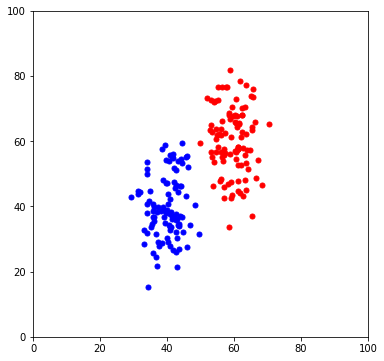

In [25]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

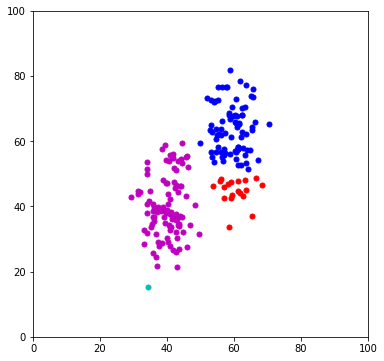

In [26]:
lm = linkage(data,metric='euclidean',method='centroid')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)

**Ward linkage:** Wikipidea says _Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging._

- based on minimizing a variance criterion before and after merging


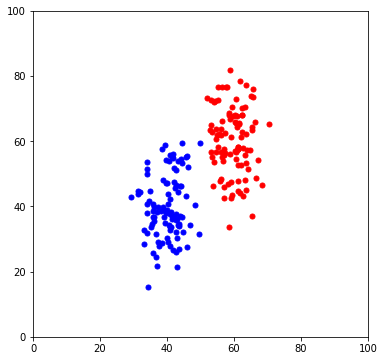

In [28]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,2,criterion='maxclust')
plotclusters(data,assignment)

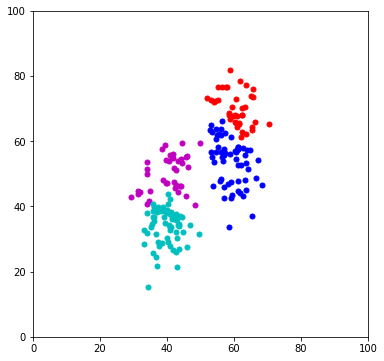

In [29]:
lm = linkage(data,metric='euclidean',method='ward')
assignment = fcluster(lm,4,criterion='maxclust')
plotclusters(data,assignment)